# Exploring OpenAI API

## Task 1: Import Modules and Packages

In [1]:
from openai import OpenAI
import pandas as pd
import requests
from datetime import datetime
from pprint import pprint
import tiktoken
from pypdf import PdfReader
from IPython.display import Image, Markdown, display
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Task 2: Set the API Key

In [9]:
client = OpenAI(api_key="<YOUR_API_KEY>")

In [10]:
pd.set_option('display.max_colwidth', None)

def pp(df):
    return display( df.style.set_properties(subset=['emails'], **{'text-align': 'left', 'white-space': 'pre-wrap', 'width': '900px'}) ) 

## Task 3: Generate Emails for Reviews

In [11]:
columns = ['reviews', 'emails']
df = pd.DataFrame(columns=columns)
df['reviews'] = [
    "Nice socks, great colors, just enough support for wearing with a good pair of sneakers.",
    "Love Deborah Harness's Trilogy! Didn't want the story to end and hope they turn this trilogy into a movie. I would love it if she wrote more books to continue this story!!!",
    "SO much quieter than other compressors. VERY quick as well. You will not regret this purchase.",
    "Shirt a bit too long, with heavy hem, which inhibits turning over. I cut off the bottom two inches all around, and am now somewhat comfortable. Overall, material is a bit too heavy for my liking.",
    "The quality on these speakers is insanely good and doesn't sound muddy when adjusting bass. Very happy with these.",
    "Beautiful watch face. The band looks nice all around. The links do make that squeaky cheapo noise when you swing it back and forth on your wrist which can be embarrassing in front of watch enthusiasts. However, to the naked eye from afar, you can't tell the links are cheap or folded because it is well polished and brushed and the folds are pretty tight for the most part. love the new member of my collection and it looks great. I've had it for about a week and so far it has kept good time despite day 1 which is typical of a new mechanical watch."
]
df.head()

,reviews,emails
0,"Nice socks, great colors, just enough support for wearing with a good pair of sneakers.",NaN
1,Love Deborah Harness's Trilogy! Didn't want the story to end and hope they turn this trilogy into a movie. I would love it if she wrote more books to continue this story!!!,NaN
2,SO much quieter than other compressors. VERY quick as well. You will not regret this purchase.,NaN
3,"Shirt a bit too long, with heavy hem, which inhibits turning over. I cut off the bottom two inches all around, and am now somewhat comfortable. Overall, material is a bit too heavy for my liking.",NaN
4,The quality on these speakers is insanely good and doesn't sound muddy when adjusting bass. Very happy with these.,NaN


## Task 4: Generate Python Code

In [12]:
problems = [
    "primality testing",
    "sum of unique elements",
    "longest palindrome",
    "all possible permutations of a string",
]

In [14]:
chat = [{"role": "system", "content": "You are a polite customer support representative."}]

postfix = "\n\nWrite an email to customers to address the issues put forward in the above review, thank them if they write good comments, and encourage them to make further purchases. Do not give promotion codes or discounts to the customers. Do not recommend other products. Keep the emails short."
def getMail(review):
  chat_history = chat.copy()
  chat_history.append({"role":"user", "content":review+postfix})

  reply = client.chat.completions.create(
      model="gpt-3.5-turbo-1106",
      messages=chat_history
    )
  return reply.choices[0].message.content

df['emails'] = df.apply(lambda x: getMail(x.reviews), axis=1)
pp(df)

,reviews,emails
0,"Nice socks, great colors, just enough support for wearing with a good pair of sneakers.","Subject: Thank You for Your Review Dear [Customer], Thank you for taking the time to leave such a positive review of our socks. We are delighted to hear that you are enjoying the colors and support they provide. We truly appreciate your feedback and are grateful for your support. We hope to continue providing you with quality products in the future. Please do not hesitate to reach out if you have any questions or need assistance with your next purchase. Thank you again for your kind words. Best regards, [Your Name] Customer Support Team"
1,Love Deborah Harness's Trilogy! Didn't want the story to end and hope they turn this trilogy into a movie. I would love it if she wrote more books to continue this story!!!,"Subject: Thank You for Your Positive Feedback! Dear [Customer's Name], Thank you for sharing your positive feedback about Deborah Harkness's Trilogy! We are thrilled to hear that you enjoyed the story and that it left you wanting more. Your support and enthusiasm mean a lot to us, and we truly appreciate you taking the time to let us know about your experience. We're always here to assist you with any future purchases or questions you may have. Feel free to reach out to us anytime – we'd love to help you find your next great read. Thank you again for your kind words, and we hope to continue providing you with engaging stories that capture your imagination. Best regards, [Your Name] Customer Support Team"
2,SO much quieter than other compressors. VERY quick as well. You will not regret this purchase.,"Dear [Customer's Name], Thank you for taking the time to share your feedback with us! We truly appreciate your positive comments about the quietness and speed of our compressor. It's great to hear that you are satisfied with your purchase. We always strive to provide a top-notch experience for our customers, and it's feedback like yours that helps us achieve that goal. We hope you continue to enjoy using our compressor and look forward to serving you again in the future. Best regards, [Your Name] Customer Support Team"
3,"Shirt a bit too long, with heavy hem, which inhibits turning over. I cut off the bottom two inches all around, and am now somewhat comfortable. Overall, material is a bit too heavy for my liking.","Subject: Thank You for Your Feedback Dear valued customer, Thank you for taking the time to share your feedback with us. We appreciate your honesty and are sorry to hear that the shirt did not meet your expectations in terms of length and material weight. We have taken note of your comments and will use them to improve our products and provide a better shopping experience for all our customers. We hope you will give us another opportunity to serve you in the future. Your satisfaction is important to us, and we are always here to assist you with any questions or concerns. Thank you for choosing our brand, and we look forward to serving you again soon. Best regards, [Your Name] Customer Support"
4,The quality on these speakers is insanely good and doesn't sound muddy when adjusting bass. Very happy with these.,"Subject: Thank You for Your Feedback Dear Valued Customer, Thank you for taking the time to share your experience with our speakers. We greatly appreciate your positive comments and are delighted to hear that you are satisfied with the quality and performance. At [Company Name], we strive to provide the best products to our customers, and your feedback serves as encouragement to continue delivering high-quality audio solutions. We are grateful for your support and look forward to serving you again in the future. Best regards, [Your Name] Customer Support Team [Company Name]"
5,"Beautiful watch face. The band looks nice all around. The links do make that squeaky cheapo noise when you swing it back and forth on your wrist which can be embarrassing in front of watch enthusiasts. However, to the naked eye

## Task 5: Summarize Text

In [15]:
def num_tokens_from_string(text, encoding_name):
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(text))
    return num_tokens

url = "https://arxiv.org/pdf/1706.03762.pdf"
ppr_data = requests.get(url).content

with open('paper.pdf', 'wb') as handler:
    handler.write(ppr_data)


reader = PdfReader("paper.pdf")
text = ""
for page in reader.pages[:2]:
    text += page.extract_text() + "\n"

print(num_tokens_from_string(text, 'cl100k_base'))

1511


In [16]:
chat = [{"role": "system", "content": "You are a computer programmer."}]
prefix = "Write Python code for finding the "
for problem in problems:
  chat_history = chat.copy()
  chat_history.append({"role":"user", "content":prefix+problem})

  reply = client.chat.completions.create(
      model="gpt-3.5-turbo-1106",
      messages=chat_history
    )

  print(problem.upper())
  display(Markdown(reply.choices[0].message.content))

PRIMALITY TESTING


Sure! You can use the following Python code to test if a given number is prime:

```python
def is_prime(n):
    if n <= 1:
        return False
    elif n <= 3:
        return True
    elif n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True
```

You can use this function to check whether a number is prime by passing it as an argument:

```python
print(is_prime(17))  # Output: True
print(is_prime(15))  # Output: False
```

This function checks for prime numbers based on the trial division method and is efficient for moderate-sized numbers.

SUM OF UNIQUE ELEMENTS


Certainly! You can use the following Python code to find the sum of unique elements in a list:

```python
def sum_unique_elements(input_list):
    unique_elements = set(input_list)
    sum_unique = sum(unique_elements)
    return sum_unique

# Example usage
input_list = [1, 2, 3, 4, 2, 3, 5]
result = sum_unique_elements(input_list)
print("Sum of unique elements:", result)
```

In this code, we first convert the list to a set to get the unique elements, and then use the `sum` function to find the sum of these unique elements.

LONGEST PALINDROME


Here's a Python function to find the longest palindrome within a given string:

```python
def longest_palindrome(s):
    def expand_around_center(left, right):
        while left >= 0 and right < len(s) and s[left] == s[right]:
            left -= 1
            right += 1
        return s[left + 1:right]

    longest = ''
    for i in range(len(s)):
        odd_palindrome = expand_around_center(i, i)
        even_palindrome = expand_around_center(i, i + 1)
        
        if len(odd_palindrome) > len(longest):
            longest = odd_palindrome
        if len(even_palindrome) > len(longest):
            longest = even_palindrome

    return longest

# Example usage
input_string = "babad"
result = longest_palindrome(input_string)
print(result)
```

This code defines a function `longest_palindrome` that uses the "expand around center" technique to find the longest palindrome in a given string. The function iterates through the string and checks for both odd-length and even-length palindromes.

ALL POSSIBLE PERMUTATIONS OF A STRING


Certainly! You can use the `permutations` function from the `itertools` module to find all possible permutations of a string. Here's a Python code example for this:

```python
from itertools import permutations

def find_permutations(s):
    perms = [''.join(p) for p in permutations(s)]
    return perms

input_string = "abc"
all_permutations = find_permutations(input_string)
print(all_permutations)
```

When you run this code with the input string "abc", it will output all possible permutations of the input string, such as ['abc', 'acb', 'bac', 'bca', 'cab', 'cba'].

## Task 6: Generate Images

In [17]:
chat = [{"role": "system", "content": "You are an experienced Machine Learning research writer."}]
postfix = "\nSummarize the above research paper in 1000 words:\n"
query = text + postfix
chat.append({"role":"user", "content":query})

reply1 = client.chat.completions.create(
    model="gpt-3.5-turbo-1106",
    messages=chat
    )


Technical line drawing of a 5th generation stealth fighter similar in design to advanced aircraft. The drawing should emphasize an incredibly powerful turbo jet engine, capturing its intricacies. Two additional views should be featured: a front-facing perspective, capturing the frontal sleek design of the aircraft and a side view to illustrate its streamlined shape. The primary view should be the angled perspective, zooming in slightly on the engine details.

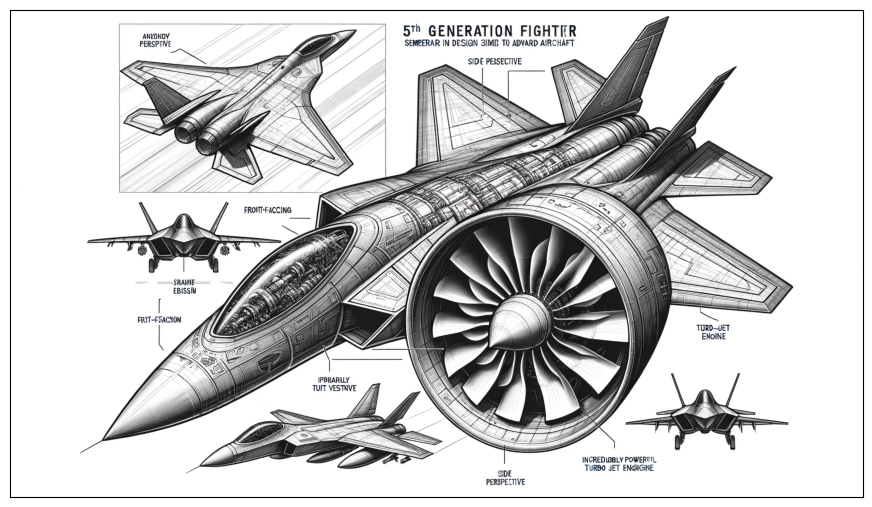

In [18]:
for i in range(1):
    response = client.images.generate(
      model="dall-e-3",
      prompt="technical line drawing of the f-35 5th generation stealth fighter. Show and highlight a single powerful turbo jet engine. Show a large slightly angled view and smaller front and side views",
      size="1792x1024",
      quality="hd",
      n=1,
    )

    display(Markdown(response.data[0].revised_prompt))

    image_url = response.data[0].url
    path='usercode/images'
    os.makedirs(path, exist_ok=True) 

    name = path+'/'+str(datetime.now())
    img_data = requests.get(image_url).content

    with open(name+'.jpg', 'wb') as handler:
        handler.write(img_data)

    plt.figure(figsize=(11,9))
    img = mpimg.imread(name+'.jpg')

    imgplot = plt.imshow(img)
    imgplot.axes.get_xaxis().set_visible(False)
    imgplot.axes.get_yaxis().set_visible(False)
    plt.show()

# End